# Cat or Dog?

In this Notebook we will finally be solving an image classification problem. Our goal will be to tell which class an input image belongs to. The way we are going to achieve it is by training a Convolutional Neural Network on thousands of images of cats and dogs and make the NN (Neural Network) learn to predict which class the image belongs to, next time it sees an image having a cat or dog in it.

## The Dataset

In order to train our machine, we need a huuuuuuge amount of data so that our model can learn from them by identifying certain relations and common features related to the objects.

Fortunately many such datasets are available on internet. In the zip file 'cats&dogs.zip' on Canvas, you will find a cats and dogs dataset which consist of 10,000 images — 5,000 of each. This will help in training as well testing our classifier. Start by unpacking the zip file, and place the 3 folders into the datasets folder of this lesson. Browse through the folders and have a look at the images in it.

<img src="./resources/cd.jpeg"  style="height: 300px"/>

## Part 1 - Building the CNN

First let us import all the required keras packages which we are going to build our CNN with.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory

- In line 1, we've imported Sequential from keras.models, to initialise our neural network model as a sequential network.
- In line 2, we’ve imported Conv2D from keras.layers, this is to perform the convolution operation i.e the first step of a CNN.
- In line 3, we’ve imported MaxPooling2D from keras.layers, which is used for the pooling operation.
- In line 4, we’ve imported Flatten from keras.layers, which is used for Flattening. Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector. 
- And finally in line 5, we’ve imported Dense from keras.layers, which is used to perform the full connection of the neural network.
- Line 6, Dropout, will be explained later.


First, to explain the different parts of the model, **we'll use the 'older' way (pre 2023)** of creating a model. After this explanation, we'll make the same model again, but use a more concise & flexible way to create a **layered model** (the same style we already used for our plain vanilla neural network from last lesson)

To kick things off, we will create an object of the sequential class.

In [2]:
# initialising the CNN
model = Sequential()

### Step 1 - Convolution

Let us now code the Convolution step. You will be surprised to see how easy it is to actually implement these complex operations in a single line of code in Python, thanks to Keras.

In [3]:
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

We took the object (model) and added a convolution layer by using the *Conv2D* function. The Conv2D function is taking 4 arguments
- the first is the number of filters i.e 32 here
- the second argument is the shape each filter is going to be i.e 3x3 here
- the third is the input shape and the type of image (RGB or Black and White) of each image i.e the input image our CNN is going to be taking is of a 64x64 resolution and the *3* stands for RGB
- the fourth argument is the activation function we want to use, here *relu* stands for a rectifier function.

### Step 2 - Pooling

Now, we need to perform a pooling operation on the resultant feature maps we get after the convolution operation was done on an image. The primary aim of a pooling operation is to reduce the size of the images as much as possible. We start by taking our classifier object and add the pooling layer. We use Max Pooling on 2x2 matrices.

In [4]:
model.add(MaxPooling2D(pool_size = (2, 2)))

Now we will make a dropout layer to prevent overfitting, which functions by randomly eliminating some of the connections between the layers (0.2 means it drops 20% of the existing connections).

In [5]:
model.add(Dropout(0.2))

### Repeat step 1 and 2

We will build a second Convolution, Max Pooling and Dropout layer with the same parameters.

In [6]:
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

The exact number of pooling layers you should use will vary depending on the task you are doing, and it's something you'll get a feel for over time. 

### Step 3 - Flattening & Full connection

It’s time for us to now convert all the pooled images into a continuous vector through Flattening. In the last step we need to create a fully connected layer.

In [7]:
model.add(Flatten())
model.add(Dense(activation="relu", units=128))

As you can see, Dense is the function to add a fully connected layer; *units* is where we define the number of nodes that should be present in this hidden layer. These units value will be always between the number of input nodes and the output nodes but the art of choosing the most optimal number of nodes can be achieved only through experimental tries. Though it’s a common practice to use a power of 2. The activation function will be a rectifier function.

### Output Layer

Now it’s time to initialise our output layer, which should contain only one node, as it is binary classification. This single node will give us a binary output of either a Cat or Dog. We will be using a sigmoid activation function for the final layer. 

Remember: if we have more than one output neuron, and we want a clear winner among these output neurons, we would have to choose the 'softmax' activation function. Using a sigmoid activation for multiple output neurons would give a probability score for each of these outputs, not a clear winner (nor a '100%' total, for instance output1=0.95, output2=0.75, output3=0.2: so total sum not 100% when using sigmoids as the final output layer activation functions...)

In [8]:
model.add(Dense(activation="sigmoid", units=1))

### Compiling the model

Now that we have completed building our CNN model, it’s time to compile it.

Note: we use a binary crossentropy, not a (sparse) categorical crossentropy, because we have a sigmoid activation function of just one neuron. We're not comparing the entropy scores between multiple neurons, just one neuron. Hence, **binary crossentropy**

In [9]:
# compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

We can print out the model summary to see what the whole model looks like.

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

As you can see, there are nearly 1 milion parameters that need to be trained!


And, as promised, we will create the **same model** as above, but using a **list of layers** (much more concise, and now the preferred way of creating models):

In [11]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers

In [12]:
NUM_CLASSES = 1

# Create a sequential model with a list of layers
model = tf.keras.Sequential([
  layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="sigmoid") # because it's one class, we use sigmoid
])

# Compile and train your model as usual
model.compile(optimizer = optimizers.Adam(learning_rate=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)       

## Part 2 - Fitting the CNN to the images

### Step 1 - Data Preprocessing & Augmentation

#### Data Preprocessing

Since our model expects all input images of the network to be 64x64 (see the first input layer of the network), we need to resize all our data. 
And to make it as easy as possible for our network to start learning (work in the most active region), it's best to make sure that all of our inputs are in the same range of [0,1]. This is called normalization (or standarization). In the case of images, this means dividing all pixel values by 255 (since a pixel has a 8-bit value between 0-255).

#### Data Augmentation

While training your model, you need a lot of data to train upon. Suppose we have a limited number of images for our network. What to do now??

You don’t need to hunt for novel new images that can be added to your dataset. Why? Because, neural networks aren’t smart to begin with. For instance, a poorly trained neural network would think that these three tennis balls shown below, are distinct, unique images.

<img src="./resources/tennis.jpeg"  style="height: 150px"/>

So, to get more data, we just need to make minor alterations to our existing dataset, like cropping, zooming, rotating, etc. to create an entirely 'new' dataset. These tweaks all produce different pixel values, but the true image features are still in there. This principle is called **data augmentation**, and it helps to prevent overfitting on a small dataset. In that regard, it can also be looked at as a **regularization technique**.


For executing data preprocessing and augmentation, we can use 2 options in Keras. First, we'll use an **ImageDataGenerator**, which makes it easy to generate multiple batches of images that are preprocessed and tweaked.

The downside of using the ImageDataGenerator class, is that it is not a part of the model itself. So, when we save our complete model, the preprocessing isn't saved with it. If we want to deploy our model in an application and do inferencing, we need to make sure we apply the same preprocessing on our data as we used to train our model.

Therefore, a newer method was created, by **using preprocessing and augmentation layers, inside of the model**. That way we can save and load the model, including everything. Ofcourse, when we want to do inferencing (make predictions with new data), we want to switch off the augmentation layers, since we don't need the data to be tweaked. This is done automatically when using a training=False (or True if you do want it to be used) switch, when doing model.predict(new_images, training = False) - see below.

#### Data Preprocessing & Augmentation with an ImageDataGenerator

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_val_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_val_datagen.flow_from_directory('datasets/cats&dogs/training_set',
                                                 subset='training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary') 

validation_set = train_val_datagen.flow_from_directory('datasets/cats&dogs/training_set',
                                                 subset='validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('datasets/cats&dogs/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


If you want, you can find the complete explanation of each of the above parameters, in the keras documentation page. But what you need to understand as a whole of what is happening above, is that we are creating synthetic data out of the same images by performing different type of operations on these images like flipping, rotating, blurring, etc.

One important parameter is **target_size which is 64x64, the same as the input_shape**.

#### Data Preprocessing & Augmentation inside the **layered model**

Now, we'll create 'exactly' the same model as above, but include the preprocessing in the model itself, so it can be saved as well. No need for the image data generators anymore, because now we can include them as preprocessing in the model itself (only difference between the 2 models: the shear transform is adjusted to a translation).

Note: when we predict using this model, keras turns off this augmentation. Only during training is this 'augmentation to generate more data'-used.

In [14]:
NUM_CLASSES = 1
IMG_SIZE = 64
# There is no shearing option anymore, but there is a translation option
HEIGTH_FACTOR = 0.2
WIDTH_FACTOR = 0.2

# Create a sequential model with a list of layers
model_new = tf.keras.Sequential([
  # Add a resizing layer to resize the images to a consistent shape
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # Add a rescaling layer to rescale the pixel values to the [0, 1] range
  layers.Rescaling(1./255),
  # Add some data augmentation layers to apply random transformations during training
  layers.RandomFlip("horizontal"),
  layers.RandomTranslation(HEIGTH_FACTOR,WIDTH_FACTOR),
  layers.RandomZoom(0.2),



  layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(), # Or, layers.GlobalAveragePooling2D()
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="sigmoid")
])

# Compile and train your model as usual
model_new.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# We can't call the model.summary() just yet, because now we have our preprocessing and augmentation in our model. We first have to run data through it...

But, since we haven't used our DataLoaders in this new approach, we must find another way to get our training, validation, and testing data from our folders.

In [15]:
# Set the parameters for your data
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='datasets/cats&dogs/training_set',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='datasets/cats&dogs/training_set',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Create the testing dataset from the 'test' directory
test_ds = image_dataset_from_directory(
    directory='datasets/cats&dogs/test_set',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=image_size
)


Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
Found 2000 files belonging to 2 classes.


### Step 2 - Training our network

Now let's fit the data to our model! Training the network might take a while! Meanwhile you can read on!

First, we're going to train our network using the 'older' version of our datasets, via the ImageDataGenerators: training_set, validation_set, test_set. 

Later, we'll use the 'newer' version of our model, model_new, and train_ds/valid_ds/test_ds.

In [16]:
history = model.fit(training_set,
                validation_data = validation_set,
                steps_per_epoch = 10,
                epochs = 20
                )

Epoch 1/20
10/10 [==============================] - 7s 680ms/step - loss: 0.7294 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5063
Epoch 2/20
10/10 [==============================] - 6s 607ms/step - loss: 0.6884 - accuracy: 0.5375 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 5s 582ms/step - loss: 0.6946 - accuracy: 0.4844 - val_loss: 0.6918 - val_accuracy: 0.5756
Epoch 4/20
10/10 [==============================] - 5s 584ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6912 - val_accuracy: 0.5144
Epoch 5/20
10/10 [==============================] - 5s 557ms/step - loss: 0.6908 - accuracy: 0.5125 - val_loss: 0.6889 - val_accuracy: 0.4988
Epoch 6/20
10/10 [==============================] - 5s 573ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6911 - val_accuracy: 0.5825
Epoch 7/20
10/10 [==============================] - 5s 555ms/step - loss: 0.6868 - accuracy: 0.5781 - val_loss: 0.6874 - val_accuracy: 0.5956
Epoch 

In the above code, an __epoch__ is a single step in training the neural network. __steps_per_epoch__ holds the number of training images that is used during every step. So we are using 100 images during each step and train the network in 20 steps. Especially the number of images is far too less, but otherwise it would take too long. You can try to modify these parameters yourself later (1,000 might be better).

### How to interpret loss and accuracy?

- The loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, one would expect a reduction of loss after each, or several, iteration(s) or epochs. So the lower the loss, the better a model (unless the model has over-fitted to the training data).

- The loss is calculated on training (loss) and test (val_loss) data and its interpretation is how well the model is doing for these two sets. Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets.

- __The loss value should be better after each epoch.__


- The accuracy is also calculated for the training (accuracy) and the test (val_accuracy) data. The accuracy of a model for the test data, is usually determined after the model parameters are learned and fixed and no learning is taking place.

- After each epoch, the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated.

- __If the model has a good accuracy but bad val_accuracy, it performs way better for the train data than for the test data. In this case it is overfitted.__

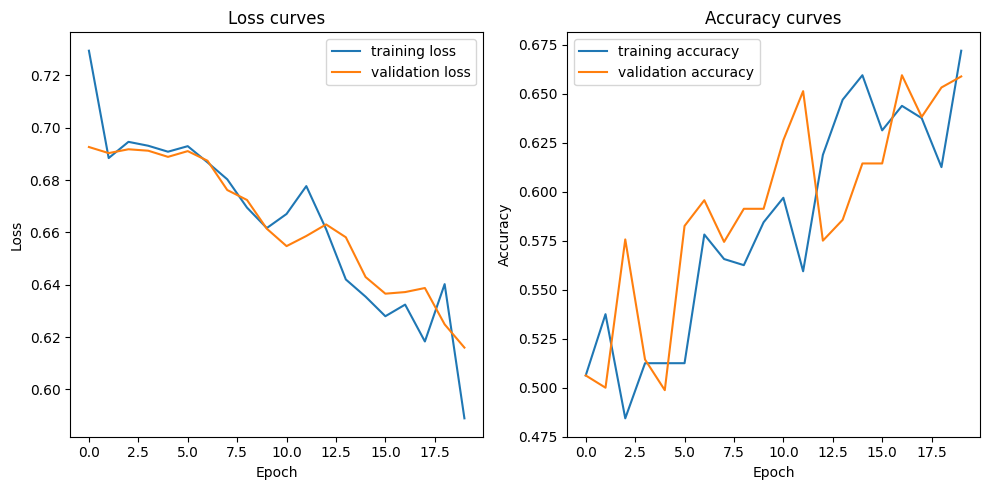

In [17]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

Now, we'll do the same fit, but using the preferred newer way, so with our layered model, including the preprocessing and augmentation. And using the seperate datasets: train_ds and validation_ds.

You'll notice that this training is a lot faster (optimized for speed)

In [18]:
history2 = model_new.fit(train_ds,
                validation_data = validation_ds,
                steps_per_epoch = 10,
                epochs = 20
                )

Epoch 1/20


10/10 [==============================] - 4s 227ms/step - loss: 0.8500 - accuracy: 0.5156 - val_loss: 0.6938 - val_accuracy: 0.4875
Epoch 2/20
10/10 [==============================] - 2s 210ms/step - loss: 0.6896 - accuracy: 0.5312 - val_loss: 0.6961 - val_accuracy: 0.4875
Epoch 3/20
10/10 [==============================] - 2s 207ms/step - loss: 0.7008 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.4869
Epoch 4/20
10/10 [==============================] - 2s 206ms/step - loss: 0.6945 - accuracy: 0.4688 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch 5/20
10/10 [==============================] - 2s 208ms/step - loss: 0.6912 - accuracy: 0.5156 - val_loss: 0.6931 - val_accuracy: 0.5125
Epoch 6/20
10/10 [==============================] - 2s 209ms/step - loss: 0.6987 - accuracy: 0.4594 - val_loss: 0.6932 - val_accuracy: 0.5075
Epoch 7/20
10/10 [==============================] - 2s 210ms/step - loss: 0.6928 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5081
Epoch 8/20
10/10 

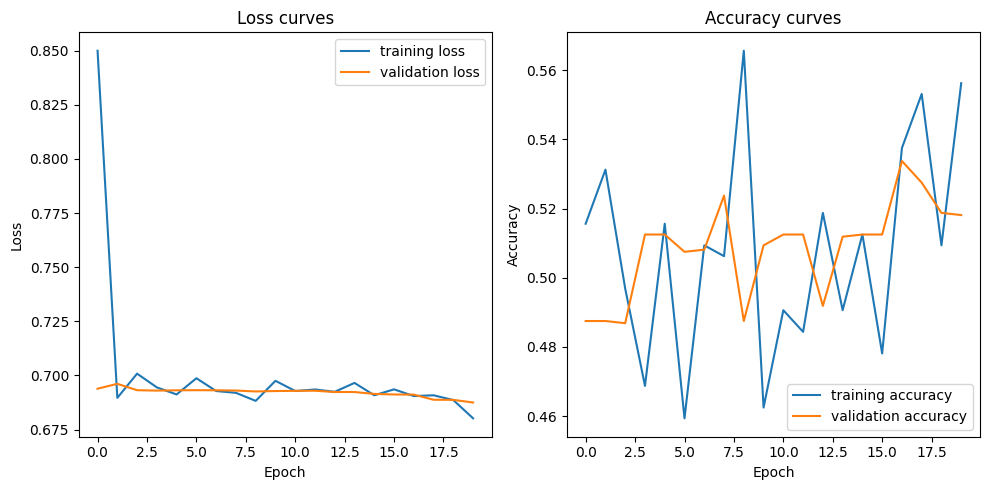

In [19]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history2.history['loss'], label='training loss')
ax1.plot(history2.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history2.history['accuracy'], label='training accuracy')
ax2.plot(history2.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

### Saving and loading the weights

Since it might take a while to train the model, after completing the fit, you can save the calculated weights and load them again next time you want to use the model again.
Or work with ModelCheckPoints (see previous notebook 'Zalando')

```python
# save model

#model.save("saved_models/modelcatsdogs.keras")
model.save("saved_models/modelcatsdogs.tf")
#model.save("saved_models/modelcatsdogs.h5")

# load model
model = load_model("saved_models/modelcatsdogs.tf")

```

## Part 3 - Making new predictions from our trained model for single image

Now let's test some random images. In the `singe_image` folder you will find some images of cats and dogs to test your model.

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [21]:
test_image = image.load_img("datasets/cats&dogs/single_image/woody.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
    prediction = "dog"
else:
    prediction = "cat"
print(prediction)

1/1 [==============================] - 0s 110ms/step
dog


The test_image holds the image that needs to be tested on the CNN. Once we have the test image, we will prepare the image to be sent into the model by converting its resolution to 64x64 as the model only excepts that resolution. Then we are using predict() method on our classifier object to get the prediction. As the prediction will be in a binary form, we will be receiving either a 1 or 0, which will represent a dog or a cat respectively.

Though it is not 100% accurate, it will give correct predictions most of the times. Try adding more convolutional and pooling layers, play with the number of nodes and epochs, and you might get a higher accuracy result.

Maybe you've got a cat or a dog yourself? Take a picture and see if the model can predict if it's a cat or a dog? You can even try it with your own image and see what it predicts. Whether you look close to a dog or a cat.

## Part 4 - Evaluation of our model

Ofcourse, prediction of a single image is nice, but to measure how accurate our model really is, we need to run inference on our test data. Or we could even print out a confusion matrix. But, we'll leave that part for now. We just want to know the accuracy of the model.

We'll compare the model from our old way of creating a model and using the external image datagenerators, versus the newer way. So, we'll run the evaluate first on test_set, and then on test_ds. There will be a slight difference, because both use a random augmentation.


In [22]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy (old model):', test_acc)

test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy (model_new):', test_acc)

63/63 [==============================] - 4s 56ms/step - loss: 0.6056 - accuracy: 0.6805
Test accuracy (old model): 0.6804999709129333
63/63 [==============================] - 2s 22ms/step - loss: 5.3197 - accuracy: 0.6340
Test accuracy (model_new): 0.6340000033378601


Conclusion: both models are okay, but not great. In reality, I would experiment some more with the amount of epochs, the model architecture, the learning rate, etc. Remember: designing a good neural network is more like an art-form...